# Discretización de un doble integrador en VE por ZOH

- Plantear el modelo del doble integrador en VE (continua)
- Discretizar usando c2d con método ZOH
- Validar el resultado comparando las respuestas del sistema de tiempo continuo y el discretizado

In [1]:
import sys
if 'google.colab' in sys.modules:
    # Instalación solo si está en Colab
    %pip install control

import control as ctl
import numpy as np
from matplotlib import pyplot as plt

Sistema de tiempo continuo <LinearIOSystem>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[0. 1.]
     [0. 0.]]

B = [[0.]
     [1.]]

C = [[1. 0.]]

D = [[0.]]

Muestreo cada 50.0 samples
Sistema de tiempo discreto <LinearIOSystem>: sys[2]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (2): ['x[0]', 'x[1]']

A = [[1.  0.1]
     [0.  1. ]]

B = [[0.005]
     [0.1  ]]

C = [[1. 0.]]

D = [[0.]]

dt = 0.1



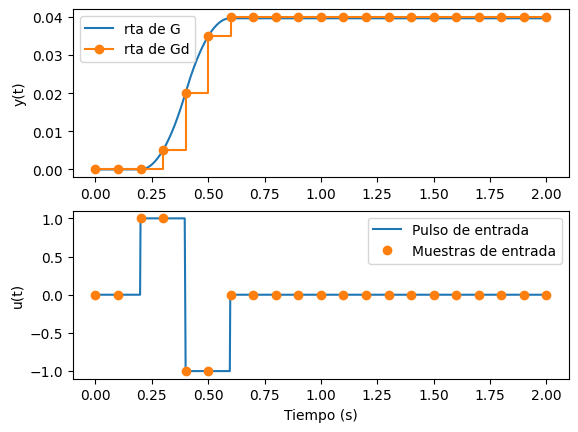

In [3]:
# Respuesta al pulso de un doble integrador
t = np.linspace(0, 2, 1001)
u = np.zeros_like(t)
u[100:199] = 1  # Pulso unitario entre t=1
u[200:299] = -1  # Pulso unitario entre t=1

G = ctl.ss([[0, 1], [0, 0]],[[0], [1]], [[1, 0]], [[0]])
print("Sistema de tiempo continuo",G)

T = 0.1
N = T/(t[1]-t[0])
print(f'Muestreo cada {N} samples')

Gd = ctl.c2d(G,Ts=T, method='zoh')
print("Sistema de tiempo discreto",Gd)


uk = u[0:len(u):int(N)]  # Muestreo cada 10 muestras

# Respuesta al impulso
t, y = ctl.forced_response(G, t, U=u)
t_k, y_k = ctl.forced_response(Gd, U=uk)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, y, label='rta de G')
plt.step(t_k, y_k, 'o-',where='post',label='rta de Gd')
plt.ylabel('y(t)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(t, u, label='Pulso de entrada')
plt.step(t_k, uk, 'o',  where='post',label='Muestras de entrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('u(t)')
plt.legend()